# 📉 Notebook 00: Introducción a la Regresión Lineal

**Versión:** 2.0 | **Curso:** Machine Learning Supervisado - PECD UNI

---

## 📑 Índice
1. [Contexto y Objetivos](#1-contexto-y-objetivos) 🎯
2. [Fundamentos Teóricos](#2-fundamentos-teóricos) 📐
3. [Simulación: El "Juguete" Matemático](#3-simulación-el-juguete-matemático) 🎲
4. [Entrenamiento del Modelo](#4-entrenamiento-del-modelo) 🧠
5. [Visualización de Residuos](#5-visualización-de-residuos) 📊
6. [Validación de Supuestos](#6-validación-de-supuestos) 🕵️
7. [Caso de Negocio: Marketing Mix](#7-caso-de-negocio-marketing-mix) 💼
8. [Resumen y Siguiente Paso](#8-resumen-y-siguiente-paso) 🏆

---

## 1. Contexto y Objetivos

### 💼 Caso de Negocio: Optimización de Presupuesto Publicitario
**Contexto:** Eres el Data Scientist de una agencia de marketing. El Director quiere saber cómo distribuir su presupuesto anual entre **TV, Radio y Periódico** para maximizar las ventas.

**El Problema:** Históricamente han invertido por intuición. Necesitan datos para justificar el gasto y optimizar el ROI.

**Tu Misión:** Construir un modelo de **Regresión Lineal** que cuantifique el retorno de inversión de cada canal publicitario.

### 🎯 Objetivos de Aprendizaje
1. **Intuición Geométrica:** Entender la regresión como la "mejor línea recta" que minimiza errores.
2. **Interpretación:** Leer coeficientes ($\beta$) como palancas de negocio.
3. **Diagnóstico:** Validar los supuestos teóricos (Linealidad, Homocedasticidad, Normalidad).

In [ ]:
# 📦 Imports y Configuración
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Configuración Visual
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12


---

## 2. Fundamentos Teóricos

La Regresión Lineal asume que la realidad se comporta (aproximadamente) como una **línea recta**:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \epsilon $$

### 📖 Glosario de Términos
| Símbolo | Nombre | Significado en Negocio |
|---------|--------|------------------------|
| $y$ | Target | Lo que queremos predecir (Ventas) |
| $x_i$ | Features | Variables predictoras (Inversión TV, Radio) |
| $\beta_0$ | Intercepto | Valor base cuando todas las X son 0 |
| $\beta_i$ | Pendiente | Cuánto cambia Y por cada unidad de X |
| $\epsilon$ | Error | Ruido irreducible del mundo real |

### 📉 ¿Cómo encuentra la "mejor" línea?
El modelo minimiza el **MSE** (Error Cuadrático Medio):

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

**Analogía:** Imagina bajar una montaña con los ojos vendados. Tanteas con el pie (calculas el gradiente), das un paso hacia abajo, y repites hasta llegar al valle (mínimo error).

---

## 3. Simulación: El "Juguete" Matemático

Antes de usar datos reales, construiremos un dataset **donde conocemos la verdad**. Esto nos permitirá verificar si el modelo "descubre" la fórmula oculta.

**Fórmula oculta:** $y = 10 + 2.5x + \epsilon$

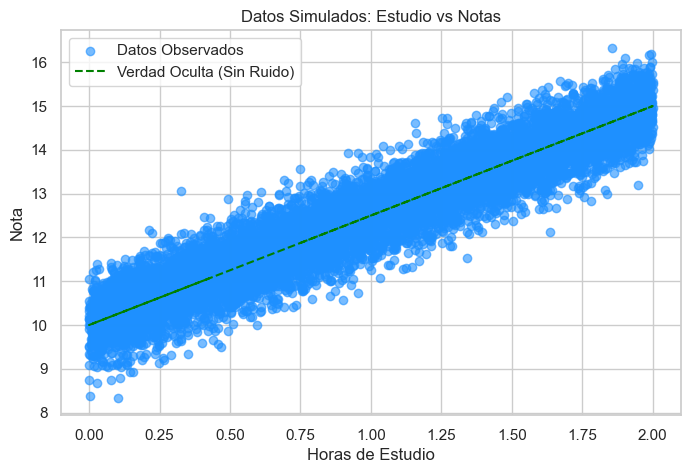

In [ ]:
# Constantes de Simulación
N_SAMPLES = 10000
RUIDO = 0.5
SEED = 42

np.random.seed(SEED)

# Generar Feature (X): Horas de Estudio
X = 2 * np.random.rand(N_SAMPLES, 1)  # Valores entre 0 y 2

# Generar Target (y): Nota del Examen
# Fórmula Real: Nota = 10 + 2.5 * Horas + Ruido
y_real = 10 + 2.5 * X
y = y_real + np.random.randn(N_SAMPLES, 1) * RUIDO

# Visualización
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='dodgerblue', alpha=0.6, label='Datos Observados')
plt.plot(X, y_real, color='green', linestyle='--',
         label='Verdad Oculta (Sin Ruido)')
plt.xlabel('Horas de Estudio')
plt.ylabel('Nota')
plt.title('Datos Simulados: Estudio vs Notas')
plt.legend()
plt.show()


---

## 4. Entrenamiento del Modelo

Usaremos `LinearRegression` de Scikit-Learn para encontrar los parámetros óptimos ($\beta_0$ y $\beta_1$).

In [ ]:
# Instanciar y Entrenar
modelo = LinearRegression()
modelo.fit(X, y)

# Extraer parámetros aprendidos
beta_0 = modelo.intercept_[0]
beta_1 = modelo.coef_[0][0]

print(f"🧠 El modelo aprendió:  y = {beta_0:.2f} + {beta_1:.2f}x")
print(f"📜 La fórmula real es: y = 10.00 + 2.50x")


🧠 El modelo aprendió:  y = 10.02 + 2.49x
📜 La fórmula real es: y = 10.00 + 2.50x


---

## 5. Visualización de Residuos

El **Residuo** ($e_i = y_i - \hat{y}_i$) es la distancia vertical entre el punto real y la predicción. El modelo minimiza la suma de estos residuos al cuadrado (MSE).

c:\ProgramData\Anaconda3\envs\ml_pro\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


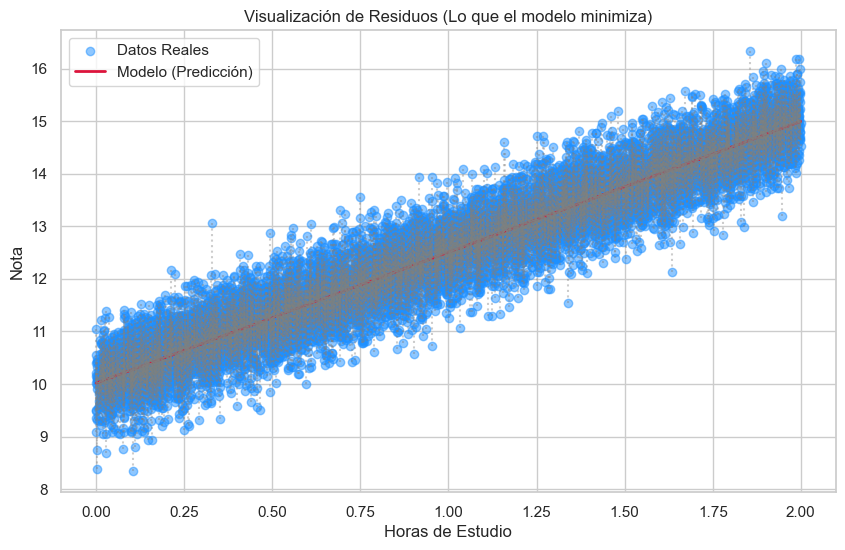

In [ ]:
y_pred = modelo.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='dodgerblue', alpha=0.5, label='Datos Reales')
plt.plot(X, y_pred, color='crimson', linewidth=2, label='Modelo (Predicción)')

# Dibujar líneas de error (Residuos)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_pred[i]],
             color='gray', linestyle=':', alpha=0.4)

plt.title('Visualización de Residuos (Lo que el modelo minimiza)')
plt.xlabel('Horas de Estudio')
plt.ylabel('Nota')
plt.legend()
plt.show()


---

## 6. Validación de Supuestos

Para confiar en una regresión lineal, debemos validar sus **supuestos teóricos**:

| Supuesto | Qué Significa | Cómo Detectarlo |
|----------|---------------|-----------------|
| **Linealidad** | La relación X-Y es lineal | Gráfico de dispersión |
| **Normalidad** | Los errores siguen N(0, σ²) | Histograma de residuos |
| **Homocedasticidad** | Varianza del error constante | Residuos vs Predicción |

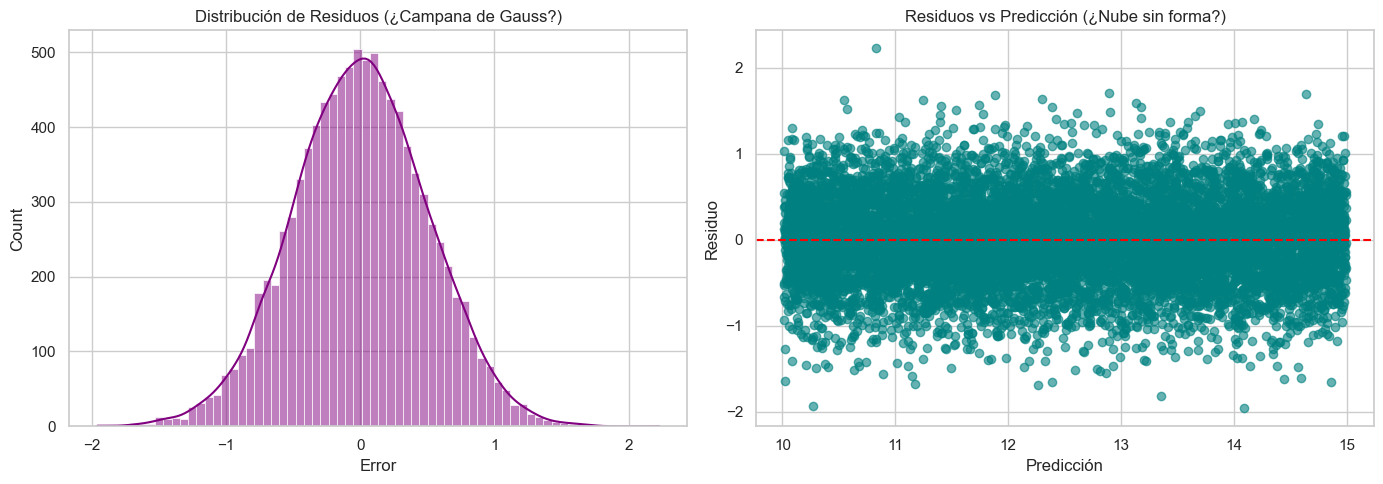

In [ ]:
residuos = y - y_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Histograma de Residuos (Normalidad)
sns.histplot(residuos.flatten(), kde=True, ax=axes[0], color='purple')
axes[0].set_title('Distribución de Residuos (¿Campana de Gauss?)')
axes[0].set_xlabel('Error')

# 2. Residuos vs Predicción (Homocedasticidad)
axes[1].scatter(y_pred, residuos, alpha=0.6, color='teal')
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Residuos vs Predicción (¿Nube sin forma?)')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Residuo')

plt.tight_layout()
plt.show()


> **💡 Pro-Tip: Interpretando los Gráficos de Diagnóstico**
> - **Histograma (izq.):** Buscamos una **campana de Gauss** centrada en 0.
> - **Residuos vs Predicción (der.):** Buscamos una **nube aleatoria** alrededor de la línea roja.
>   - Si ves forma de "U": falta linealidad → necesitas términos cuadráticos ($x^2$).
>   - Si ves "embudo": falta homocedasticidad → el error crece con la predicción.

---

## 7. Caso de Negocio: Marketing Mix Modeling

Ahora aplicaremos todo lo aprendido a un escenario real: **optimizar la inversión publicitaria**.

### 📂 Diccionario de Datos (Simulado)
| Variable | Descripción | Unidad |
|----------|-------------|--------|
| `TV` | Inversión en publicidad de TV | Miles de $ |
| `Radio` | Inversión en publicidad de Radio | Miles de $ |
| `Newspaper` | Inversión en publicidad impresa | Miles de $ |
| `Ventas` | Ventas generadas (Target) | Miles de unidades |

In [ ]:
# Generación de Datos de Marketing
np.random.seed(101)
n_mkt = 200

tv = np.random.normal(150, 40, n_mkt)
radio = np.random.normal(30, 10, n_mkt)
news = np.random.normal(40, 20, n_mkt)

# Ventas = 5 + 0.05*TV + 0.15*Radio + 0*News + Ruido
ventas = 5 + 0.05*tv + 0.15*radio + 0.002*news + np.random.normal(0, 2, n_mkt)

df_mkt = pd.DataFrame(
    {'TV': tv, 'Radio': radio, 'Newspaper': news, 'Ventas': ventas})
df_mkt.head()


,TV,Radio,Newspaper,Ventas
0,258.273994,27.204898,81.702318,19.835733
1,175.125308,40.627104,34.163567,20.597210
2,186.318778,47.520144,63.826096,19.777492
3,170.153030,36.955467,46.812682,20.010146
4,176.044718,31.536608,15.318850,18.002499


In [ ]:
# Entrenamiento
X_mkt = df_mkt[['TV', 'Radio', 'Newspaper']]
y_mkt = df_mkt['Ventas']

modelo_mkt = LinearRegression()
modelo_mkt.fit(X_mkt, y_mkt)

# Coeficientes
coef_df = pd.DataFrame(
    modelo_mkt.coef_, index=X_mkt.columns, columns=['Impacto (Beta)'])
print(f"Intercepto (Ventas base): {modelo_mkt.intercept_:.2f}")
coef_df


Intercepto (Ventas base): 5.28


,Impacto (Beta)
TV,0.049354
Radio,0.154881
Newspaper,-0.007227


### 🧠 Interpretación de Negocio

| Canal | $\beta$ | Interpretación |
|-------|---------|----------------|
| **TV** | ≈ 0.05 | Por cada \$1,000 invertidos → +50 unidades vendidas. Retorno bajo. |
| **Radio** | ≈ 0.15 | Por cada \$1,000 invertidos → +150 unidades. **¡El canal estrella!** |
| **Newspaper** | ≈ 0.00 | Sin impacto significativo. **Inversión desperdiciada.** |

> **⚠️ Real-World Warning: Correlación ≠ Causalidad**
> Estos coeficientes muestran *asociación*, no causalidad. En la vida real, podrían existir **variables confusoras** (ej: la TV se usa más en ciudades grandes, donde ya hay más ventas). Para inferir causalidad, se necesitan experimentos A/B o técnicas como Variables Instrumentales.

In [ ]:
# 📏 Métricas de Desempeño
y_pred_mkt = modelo_mkt.predict(X_mkt)

mae = mean_absolute_error(y_mkt, y_pred_mkt)
rmse = np.sqrt(mean_squared_error(y_mkt, y_pred_mkt))
r2 = r2_score(y_mkt, y_pred_mkt)

print("=" * 50)
print("📊 MÉTRICAS DEL MODELO")
print("=" * 50)
print(f"MAE:  {mae:.2f} unidades (Error promedio absoluto)")
print(f"RMSE: {rmse:.2f} unidades (Penaliza errores grandes)")
print(f"R²:   {r2:.2f} → Explicamos el {r2*100:.0f}% de la varianza")
print("=" * 50)


📊 MÉTRICAS DEL MODELO
MAE:  1.65 unidades (Error promedio absoluto)
RMSE: 2.08 unidades (Penaliza errores grandes)
R²:   0.60 → Explicamos el 60% de la varianza


### 🧠 Micro-Desafío: Predicción de Ventas

El gerente te da un presupuesto de **\$200k en TV, \$50k en Radio y \$0 en Periódico**.

**Pregunta:** ¿Cuántas ventas pronosticas?

*Pista: Usa `modelo_mkt.predict([[200, 50, 0]])`*

In [ ]:
# ================================
# 🧠 TU TURNO: Micro-Desafío
# ================================
# Descomenta las líneas y ejecuta

inv_tv = 2000000
inv_ra = 50000
inv_pe = 0

feature = [inv_tv, inv_ra, inv_pe]

prediccion = modelo_mkt.predict([feature])
print(f"Ventas esperadas: {prediccion[0]:.2f} miles de unidades")


Ventas esperadas: 106456.57 miles de unidades


c:\ProgramData\Anaconda3\envs\ml_pro\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


---

## 8. Resumen y Siguiente Paso

### 🏆 Resumen de Logros
¡Felicidades! En este notebook has aprendido:

1. **La Intuición:** La Regresión Lineal busca la "mejor línea recta" minimizando el MSE.
2. **La Fórmula:** $y = \beta_0 + \beta_1 x + \epsilon$, donde cada $\beta$ tiene significado de negocio.
3. **El Diagnóstico:** Validar supuestos (Normalidad, Homocedasticidad) antes de confiar en el modelo.
4. **La Aplicación:** Interpretar coeficientes como ROI de canales publicitarios.

### ⚠️ Limitaciones de la Regresión Lineal
- Solo modela relaciones **lineales** (no captura curvas).
- Sensible a **outliers** extremos.
- Asume que los errores son **independientes** (cuidado con series de tiempo).

---

### 👉 Siguiente Paso
En el siguiente notebook exploraremos la **Regresión Logística** para problemas de **clasificación binaria** (ej: ¿el cliente se irá o se quedará?).

*Verás cómo la función Sigmoide transforma la regresión en una herramienta de clasificación.*